In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly_express as px

In [29]:
import sys
print(sys.executable)

c:\Users\user\AppData\Local\Programs\Python\Python312\python.exe


In [30]:
data1=pd.read_csv("./yfinance_data/AAPL_historical_data.csv")
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [31]:
data1.info()
data1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

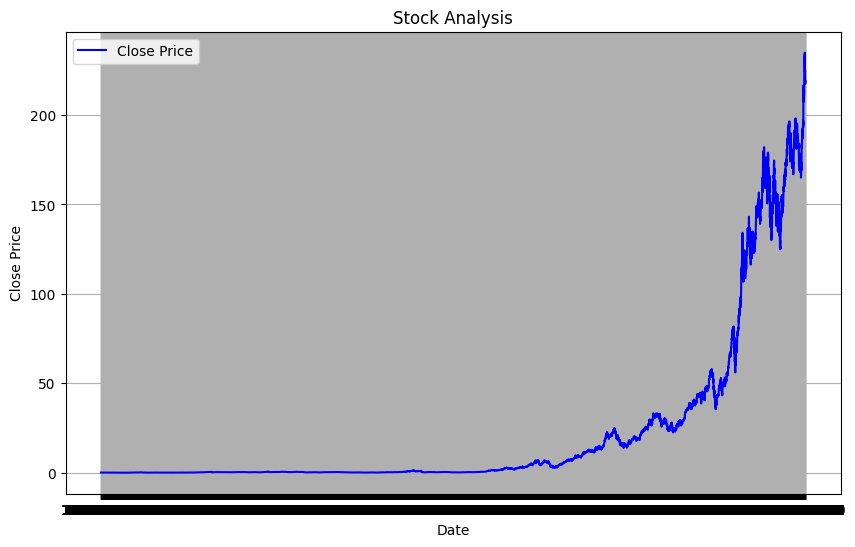

In [32]:


plt.figure(figsize=(10, 6))
plt.plot(data1.index, data1['Close'], label='Close Price', color='blue')
plt.title('Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()data1.set_index('Date', inplace=True)
plt.grid(True)
plt.show()

In [58]:
import plotly.graph_objects as go
data1.info()
import plotly.io as pio
import plotly.io as pio
pio.renderers.default = 'browser'


<class 'pandas.core.frame.DataFrame'>
Index: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10998 non-null  float64
 1   High          10998 non-null  float64
 2   Low           10998 non-null  float64
 3   Close         10998 non-null  float64
 4   Adj Close     10998 non-null  float64
 5   Volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 773.3+ KB


In [59]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Adj Close'], mode='lines', name='Adj Close'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Volume'], mode='lines', name='Volume'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Dividends'], mode='lines', name='Dividends'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['Stock Splits'], mode='lines', name='Stock Splits'))

fig.update_layout(
    title='Stock Analysis',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)
fig.show()

In [61]:
data1['SMA_50'] = data1['Close'].rolling(window=50).mean()
data1['SMA_200'] = data1['Close'].rolling(window=200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (Pandas)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()


In [62]:
import numpy as np
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size


data1['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data1['Close'], 50)])
data1['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data1['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data1.index, y=data1['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data1.index, y=data1['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (NumPy)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()

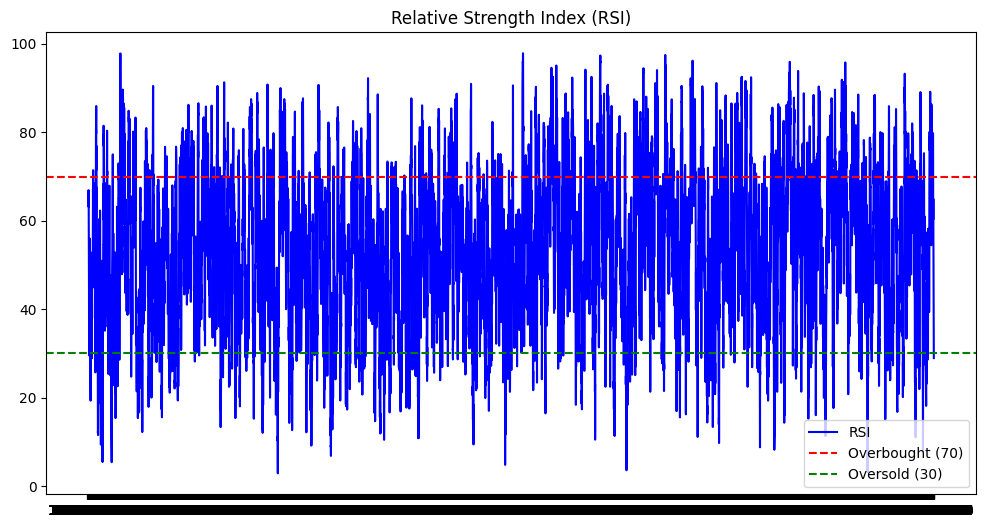

In [63]:
def calculate_RSI(data, window=14):
    delta = np.diff(data)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    
    avg_gain = np.convolve(gain, np.ones(window), 'valid') / window
    avg_loss = np.convolve(loss, np.ones(window), 'valid') / window
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    rsi = np.concatenate([np.full(window, np.nan), rsi])
    
    return rsi

data1['RSI'] = calculate_RSI(data1['Close'].values)

# Plotting RSI
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



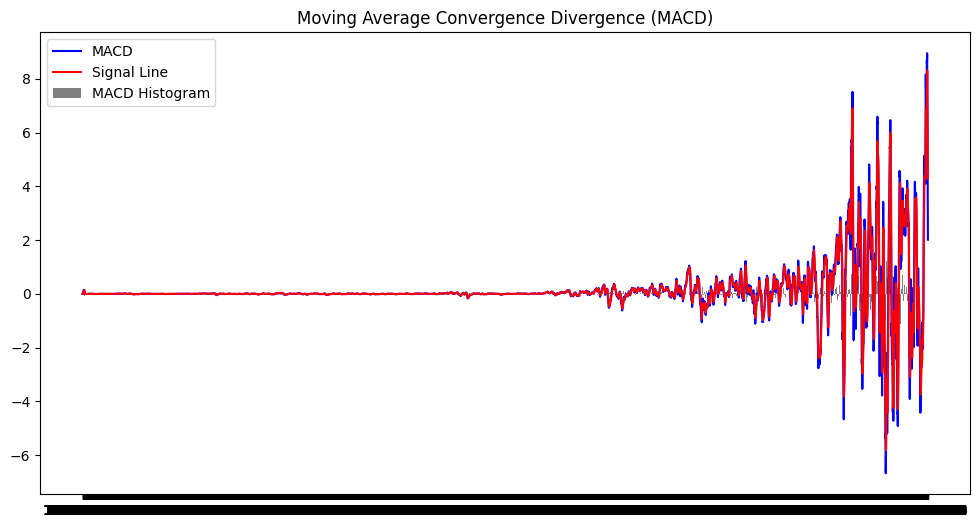

In [64]:
def calculate_EMA(data, window):
    alpha = 2 / (window + 1)
    ema = np.zeros_like(data)
    ema[window-1] = np.mean(data[:window])
    for i in range(window, len(data)):
        ema[i] = alpha * (data[i] - ema[i-1]) + ema[i-1]
    return ema

def calculate_MACD(data, short_window=12, long_window=26, signal_window=9):
    ema_short = calculate_EMA(data, short_window)
    ema_long = calculate_EMA(data, long_window)
    macd = ema_short - ema_long
    signal_line = calculate_EMA(macd, signal_window)
    macd_histogram = macd - signal_line
    return macd, signal_line, macd_histogram

data1['MACD'], data1['Signal Line'], data1['MACD Histogram'] = calculate_MACD(data1['Close'].values)

# Plotting MACD
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['MACD'], label='MACD', color='blue')
plt.plot(data1.index, data1['Signal Line'], label='Signal Line', color='red')
plt.bar(data1.index, data1['MACD Histogram'], label='MACD Histogram', color='gray')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.show()


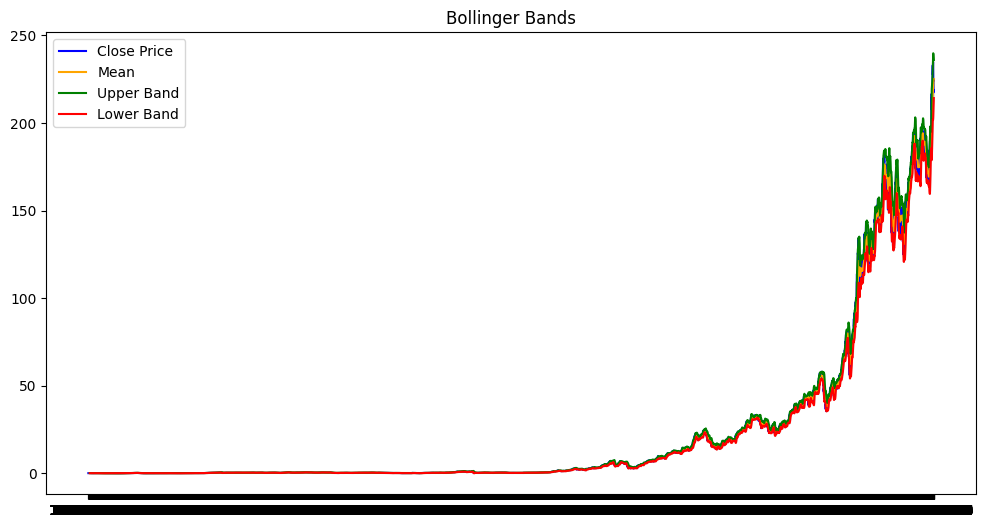

In [65]:
def calculate_Bollinger_Bands(data, window=20, num_std_dev=2):
    rolling_mean = np.convolve(data, np.ones(window), 'valid') / window
    rolling_std = np.array([np.std(data[i-window:i]) for i in range(window, len(data)+1)])
    
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    
    rolling_mean = np.concatenate([np.full(window-1, np.nan), rolling_mean])
    upper_band = np.concatenate([np.full(window-1, np.nan), upper_band])
    lower_band = np.concatenate([np.full(window-1, np.nan), lower_band])
    
    return rolling_mean, upper_band, lower_band

data1['Bollinger_Mean'], data1['Bollinger_Upper'], data1['Bollinger_Lower'] = calculate_Bollinger_Bands(data1['Close'].values)

# Plotting Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['Close'], label='Close Price', color='blue')
plt.plot(data1.index, data1['Bollinger_Mean'], label='Mean', color='orange')
plt.plot(data1.index, data1['Bollinger_Upper'], label='Upper Band', color='green')
plt.plot(data1.index, data1['Bollinger_Lower'], label='Lower Band', color='red')
plt.fill_between(data1.index, data1['Bollinger_Upper'], data1['Bollinger_Lower'], color='gray', alpha=0.2)
plt.title('Bollinger Bands')
plt.legend()
plt.show()


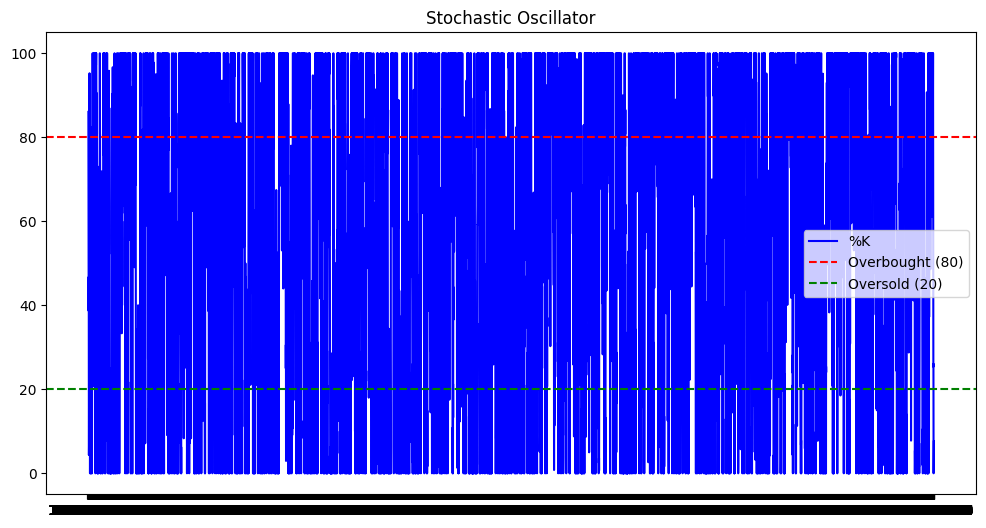

In [66]:
def calculate_Stochastic_Oscillator(data, window=14):
    lowest_low = np.array([np.min(data[i-window:i]) for i in range(window, len(data)+1)])
    highest_high = np.array([np.max(data[i-window:i]) for i in range(window, len(data)+1)])
    k_values = 100 * ((data[window-1:] - lowest_low) / (highest_high - lowest_low))
    k_values = np.concatenate([np.full(window-1, np.nan), k_values])
    return k_values

data1['Stochastic_Oscillator'] = calculate_Stochastic_Oscillator(data1['Close'].values)

# Plotting Stochastic Oscillator
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['Stochastic_Oscillator'], label='%K', color='blue')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()


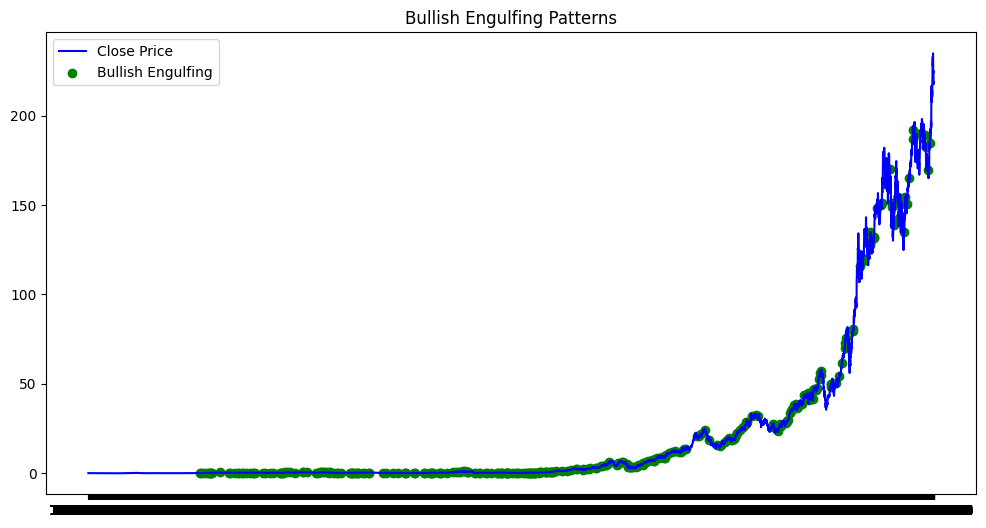

In [70]:
def detect_bullish_engulfing(open_prices, close_prices):
    bullish_engulfing = np.zeros_like(open_prices, dtype=bool)
    for i in range(1, len(open_prices)):
        if (close_prices[i] > open_prices[i]) and (close_prices[i-1] < open_prices[i-1]) and \
           (open_prices[i] < close_prices[i-1]) and (close_prices[i] > open_prices[i-1]):
            bullish_engulfing[i] = True
    return bullish_engulfing
data1['Bullish_Engulfing'] = detect_bullish_engulfing(data1['Open'].values, data1['Close'].values)
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['Close'], label='Close Price', color='blue')
bullish_engulfing_indices = data1.index[data1['Bullish_Engulfing']]
bullish_engulfing_close = data1['Close'][data1['Bullish_Engulfing']]
plt.scatter(bullish_engulfing_indices, bullish_engulfing_close, label='Bullish Engulfing', color='green', marker='o')
plt.title('Bullish Engulfing Patterns')
plt.legend()
plt.show()

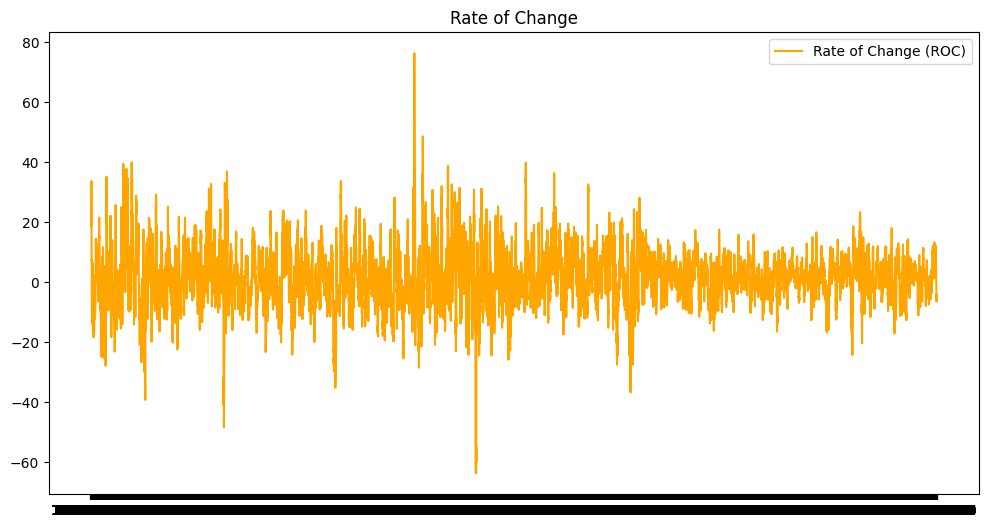

In [75]:
data1['ROC'] = data1['Close'].pct_change(periods=12) * 100

plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['ROC'], label='Rate of Change (ROC)', color='orange')
plt.title('Rate of Change')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



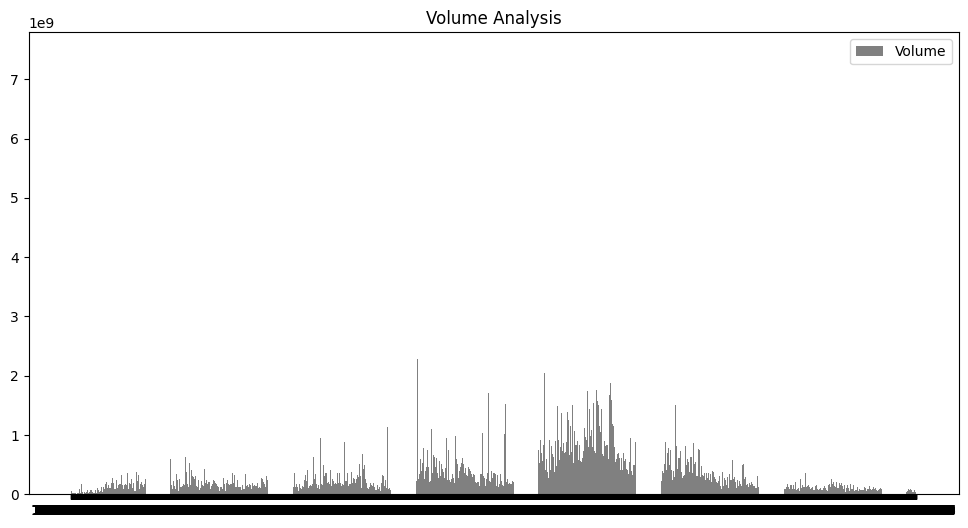

In [79]:
plt.figure(figsize=(12, 6))
plt.bar(data1.index, data1['Volume'], label='Volume', color='gray')
plt.title('Volume Analysis')
plt.legend()
plt.show()


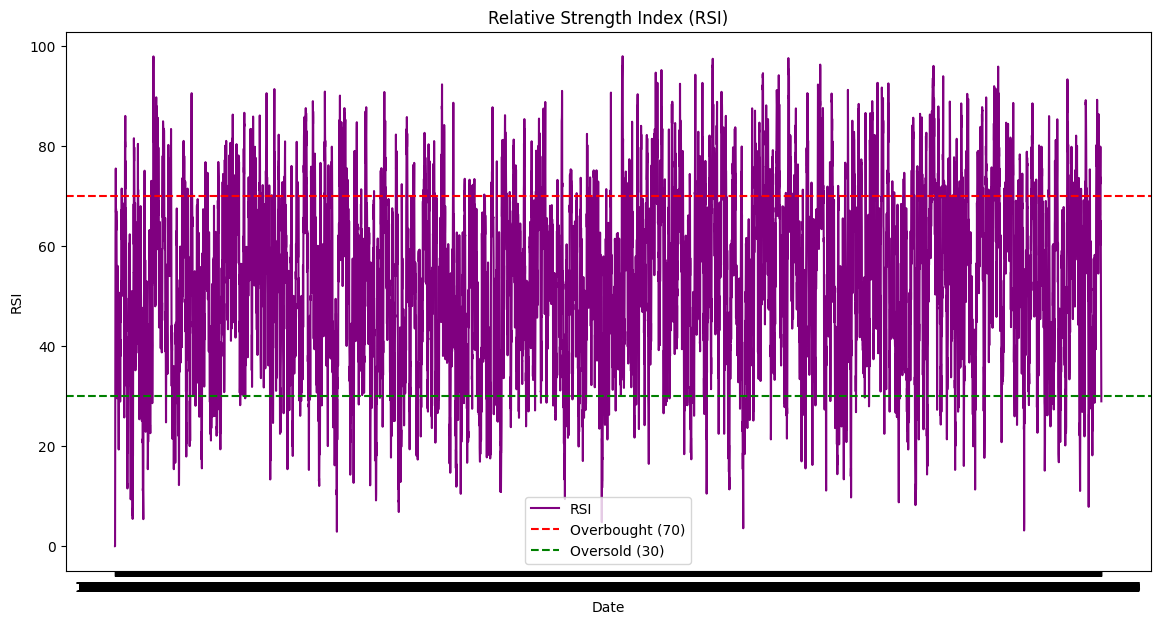

In [78]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data1['RSI'] = compute_rsi(data1, window=14)
plt.figure(figsize=(14, 7))
plt.plot(data1.index, data1['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'ta'

Amazon

In [88]:
data2=pd.read_csv("./yfinance_data/AMZN_historical_data.csv")
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [90]:
data2.info()
data2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

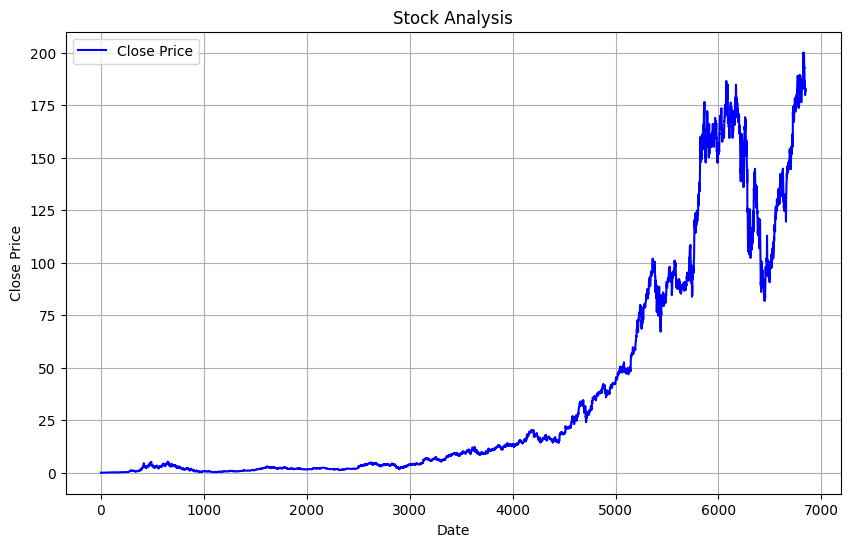

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Close'], label='Close Price', color='blue')
plt.title('Stock Analysis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
data2.set_index('Date', inplace=True)
plt.grid(True)
plt.show()

In [92]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data2.index, y=data2['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Adj Close'], mode='lines', name='Adj Close'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Volume'], mode='lines', name='Volume'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Dividends'], mode='lines', name='Dividends'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['Stock Splits'], mode='lines', name='Stock Splits'))

fig.update_layout(
    title='Stock Analysis',
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Legend'
)
fig.show()

In [93]:
data2['SMA_50'] = data2['Close'].rolling(window=50).mean()
data2['SMA_200'] = data2['Close'].rolling(window=200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data2.index, y=data2['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (Pandas)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()

In [94]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size


data2['SMA_50'] = np.concatenate([np.full(49, np.nan), moving_average(data2['Close'], 50)])
data2['SMA_200'] = np.concatenate([np.full(199, np.nan), moving_average(data2['Close'], 200)])

fig = go.Figure()
fig.add_trace(go.Scatter(x=data2.index, y=data2['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['SMA_50'], mode='lines', name='50-day SMA'))
fig.add_trace(go.Scatter(x=data2.index, y=data2['SMA_200'], mode='lines', name='200-day SMA'))

fig.update_layout(
    title='Stock Price with Moving Averages (NumPy)',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()